<a href="https://colab.research.google.com/github/Sumit189/Abusive-Language-Detection/blob/main/notebook/Abusive_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from joblib import dump

In [2]:
!cp /content/drive/MyDrive/ExpertSystem/clean_data.csv /content/

In [3]:
data = pd.read_csv("clean_data.csv")

In [4]:
data.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [5]:
count_not_abusive = 0
count_abusive = 0
for i in data.is_offensive:
  if i == 0:
    count_not_abusive += 1
  else:
    count_abusive += 1

print("Non Abusive: {}".format(count_not_abusive))
print("Abusive: {}".format(count_abusive))

Non Abusive: 147509
Abusive: 36845


In [6]:
texts = data["text"].astype(str)
y = data["is_offensive"]

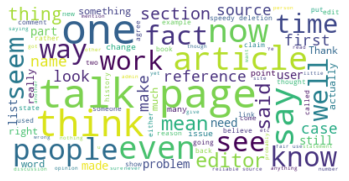

In [7]:
word_text = " ".join(map(str, texts))
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(word_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
vectorizer = TfidfVectorizer(stop_words="english", min_df=0.0001)
X = vectorizer.fit_transform(texts)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [11]:
rf = RandomForestClassifier(max_depth=100, random_state=0)

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
rf_y_hat = rf.predict(X_test)
accuracy_score(rf_y_hat, y_test) 

0.942827696563695

In [14]:
rf_score = accuracy_score(rf_y_hat, y_test) 

In [15]:
model = LinearSVC(class_weight="balanced", dual=False, tol=1e-2, max_iter=1e5)
cclf = CalibratedClassifierCV(base_estimator=model)
cclf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=100000.0,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.01,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [16]:
y_hat = cclf.predict(X_test)
cc_score = accuracy_score(y_hat, y_test) 
print(cc_score)

0.9577988120745301


In [17]:
dt = DecisionTreeClassifier(random_state=0)

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [19]:
dt_y_hat = dt.predict(X_test)
dt_score = accuracy_score(dt_y_hat, y_test)
print(dt_score)

0.9433972498711725


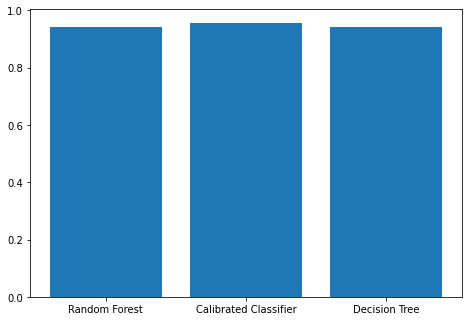

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['Random Forest', 'Calibrated Classifier', 'Decision Tree']
acc = [rf_score, cc_score, dt_score]
ax.bar(classifiers,acc)
plt.show()

# Train on Whole Set

In [21]:
model = LinearSVC(class_weight="balanced", dual=False, tol=1e-2, max_iter=1e5)
best_cclf = CalibratedClassifierCV(base_estimator=model)
best_cclf.fit(X, y)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight='balanced',
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=100000.0,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.01,
                                                verbose=0),
                       cv=None, method='sigmoid')

# Save Model

In [22]:
dump(vectorizer, "vectorizer.joblib")
dump(best_cclf, "bestmodel.joblib")

['bestmodel.joblib']

In [23]:
!cp /content/bestmodel.joblib  /content/drive/MyDrive/ExpertSystem/

In [24]:
!cp /content/vectorizer.joblib  /content/drive/MyDrive/ExpertSystem/

# Test

In [25]:
test_str = str(input())

I will throw you out idiot


In [26]:
test_x=vectorizer.transform([test_str])

In [27]:
cclf.predict(test_x)

array([1])

In [28]:
cclf.predict_proba(test_x)

array([[3.78139952e-04, 9.99621860e-01]])

In [29]:
np.max(cclf.predict_proba(test_x))*100

99.96218600476115

In [30]:
labels = ['Non Abusive', 'Abusive']

In [31]:
print("Tone: {}, Probability Score: {:.2f}%".format(labels[cclf.predict(test_x)[0]], (np.max(cclf.predict_proba(test_x))*100))) 

Tone: Abusive, Probability Score: 99.96%
